# Installations


In [ ]:
!pip install javalang

In [ ]:
!pip install scikit-bio

Set up the folder structure according to the README except for the folders `Output-code2vec`, `Output-lev` and `Output-jacc`.

# Data Collection

Below is a modified version of anjandash code from [here](https://github.com/c2nes/javalang/issues/49).

In [ ]:
import pandas as pd
import base64
import javalang
import os

def prepare_data():

    df = pd.read_csv('Raw_input/dataset-final.csv')

    # Decode the base64 encoded strings in the columns called "java-source-before"
    # and "java-source-after"
    df['java-source-before'] = df['java-source-before'].apply(lambda x: base64.b64decode(x))
    df['java-source-after'] = df['java-source-after'].apply(lambda x: base64.b64decode(x))
    return df

def get_method_start_end(method_node):
    startpos  = None
    endpos    = None
    startline = None
    endline   = None
    for path, node in tree:
        if startpos is not None and method_node not in path:
            endpos = node.position
            endline = node.position.line if node.position is not None else None
            break
        if startpos is None and node == method_node:
            startpos = node.position
            startline = node.position.line if node.position is not None else None
    return startpos, endpos, startline, endline

def get_method_text(startpos, endpos, startline, endline, last_endline_index):
    if startpos is None:
        return "", None, None, None
    else:
        startline_index = startline - 1
        endline_index = endline - 1 if endpos is not None else None

        # 1. check for and fetch annotations
        if last_endline_index is not None:
            for line in codelines[(last_endline_index + 1):(startline_index)]:
                if "@" in line:
                    startline_index = startline_index - 1
        meth_text = "<ST>".join(codelines[startline_index:endline_index])
        meth_text = meth_text[:meth_text.rfind("}") + 1]

        # 2. remove trailing rbrace for last methods & any external content/comments
        # if endpos is None and
        if not abs(meth_text.count("}") - meth_text.count("{")) == 0:
            # imbalanced braces
            brace_diff = abs(meth_text.count("}") - meth_text.count("{"))

            for _ in range(brace_diff):
                meth_text  = meth_text[:meth_text.rfind("}")]
                meth_text  = meth_text[:meth_text.rfind("}") + 1]

        meth_lines = meth_text.split("<ST>")
        meth_text  = "".join(meth_lines)
        last_endline_index = startline_index + (len(meth_lines) - 1)

        return meth_text, (startline_index + 1), (last_endline_index + 1), last_endline_index

if __name__ == "__main__":

    # Save decoded df
    df = prepare_data()

    # Iterating through each function's source code
    for index, row in df.iterrows():
      code_text = row['java-source-before'] # PRE-METHODS: code_text = row['java-source-before'] POST-METHODS: code_text = row['java-source-after']

      # Save source code to file
      with open("temp.java", "wb") as file:
          file.write(code_text)

      # Collecting source code from file
      target_file = "temp.java" # Add the path to your file
      with open(target_file, 'r') as r:
          codelines = r.readlines()
          code_text = ''.join(codelines)

      # Converting the code to methods
      try:
        lex = None
        tree = javalang.parse.parse(code_text)
        methods = {}
        for _, method_node in tree.filter(javalang.tree.MethodDeclaration):
            startpos, endpos, startline, endline = get_method_start_end(method_node)
            method_text, startline, endline, lex = get_method_text(startpos, endpos, startline, endline, lex)
            methods[method_node.name] = method_text

            # Filtering out the desired method
            # Adding space before and after to identify
            method_name = " " + row['functions'] + " "
            if method_name in method_text.split('(')[0] + " ":
              print(row['id'] + ' at index: ' + str(index))
              # Save the source code to a file
              with open("Pre-methods/"+ "/" + row['improvement-type'] + "/" + row['id'] + ".java", "w") as file: # PRE-METHODS: with open("Pre-methods/"+ "/" + row['improvement-type'] + "/" + row['entity'].split('/')[0] + '-' + row['functions'] + '-' + row['id'] + ".java", "w") as file: POST-METHODS: with open("Post-methods/"+ "/" + row['improvement-type'] + "/" + row['entity'].split('/')[0] + '-' + row['functions'] + '-' + row['id'] + ".java", "w") as file:

                # Write to file
                file.write(method_text)
      except:
        print('--> ' + row['entity'].split('/')[0] + '-' + row['functions'] + '-' + row['id'] + " could not be collected <-- " + 'at index: ' + str(index))


94afb77121c3cee2913f185178e394fac8bd5b31 at index: 0
69cc066d1f46c343cf052205711be5d6b3e7c634 at index: 1
69cc066d1f46c343cf052205711be5d6b3e7c634 at index: 1
85da5f8a9c0e268e3715794504981a73b095f585 at index: 2
9a8f977519a1f544e89c4d3b2f880adf445f1adb at index: 3
c9ac9d7229ce37572c7e75971209fc71b58c0ac4 at index: 4
3f2b22cded74204369c0cd7ea2a9cb12891a90e6 at index: 5
fa5a28e1f690d53f34892ae1e567bdab684620f6 at index: 6
d181c1dbb4213c4d0be53cc008a34b8b85fb5cbd at index: 7
2146ab368c7366c131c6cc95d45fac0b112bbabe at index: 8
89d45608d1ee8a013f583717ff95ed8363242732 at index: 9
bf9296c8707b28e8c093953bd6457979117ff8bf at index: 10
3f0013f29804e406052e4dc9b511a6becd691f8f at index: 11
7411db111b36929a87bf968b11649067f1462bc6 at index: 12
ebddf1132c874607d04e3f4362efa34f14ee8bba at index: 13
cef67354df4e315b3a86e1dd58228474302353be at index: 14
ac216f6216a787012de18bd5455086f5d0443eaa at index: 15
ba16f651bf27ea9e99dd1e18e3a1dbc0f8459b65 at index: 16
b7a0114b76f1dffcb83178923d1faaf44448c34

# Similarity Measures

Run [code2vec](https://github.com/tech-srl/code2vec), [Jaccard Distance](https://github.com/robertfeldt/MultiDistances.jl) and [Levenhstein Distance](https://github.com/robertfeldt/MultiDistances.jl) on the methods. Set up the rest of the folder structure according to the README. If you want to use our data from the similarity measures instead for the mantel test and distributions, use our files for `Output-code2vec`, `Output-lev` and `Output-jacc`.

# Mantel test

Import the code2vec vectors

In [16]:
import pandas as pd
folder = 'Output-code2vec'

df_bumpy = pd.read_csv(folder + '/Bumpy Road Ahead.csv')
df_complex = pd.read_csv(folder + '/Complex Method.csv')
df_deep = pd.read_csv(folder + '/Deep, Nested Complexity.csv')
df_excess = pd.read_csv(folder + '/Excess Number of Function Arguments.csv')
df_large = pd.read_csv(folder + '/Large Method.csv')

df_all_final = pd.concat([df_bumpy, df_complex, df_deep, df_excess, df_large])
df_all_final

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,376,377,378,379,380,381,382,383,384,id
0,0,-0.579653,-0.148386,0.633520,0.579767,-0.564380,-0.268856,0.366611,0.382592,0.217683,...,-0.627177,-0.276336,0.060895,0.320914,-0.382378,0.129640,-0.261539,0.047316,0.671174,7ea930ffa370f0d2373931cbf071e50a1ec4bb9f
1,1,0.113233,-0.616854,-0.119395,-0.123360,-0.064060,-0.032319,-0.227801,-0.036241,0.001503,...,0.582697,-0.040199,-0.602456,0.690220,-0.414116,-0.703436,0.421330,0.274980,0.510125,0e9f6cbd039e4137e3fc4138406caf350a09380e
2,2,-0.096208,-0.563231,0.779997,-0.324401,-0.612029,0.092577,0.613881,-0.654509,0.909008,...,0.027110,-0.345416,0.863250,-0.015199,-0.323641,-0.696794,-0.085356,-0.097001,0.292460,4c324bc596363b000b2175c41e78b5564747dcca
3,3,0.745068,0.766835,-0.656224,0.577439,0.217318,0.414225,-0.043877,0.406021,-0.549089,...,0.638839,-0.759657,-0.712644,0.449425,-0.232088,0.034359,-0.585366,0.661752,0.774881,f35f6b9d7bb2cc9a8dcaa4e608ecb90f20e6626d
4,4,0.150620,-0.828370,0.149493,-0.525193,0.427907,-0.486590,0.110840,0.027646,-0.522326,...,0.495710,0.255754,-0.455959,-0.885258,0.214784,-0.124909,-0.577482,-0.500722,-0.610488,bbcd3d0f3f5604b0f25e8bbdbbbc50f85e8c9efa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,39,0.076577,-0.150388,0.395018,-0.210962,-0.417063,-0.050683,-0.248883,-0.282623,0.635698,...,0.200966,-0.051205,-0.428391,0.108275,0.448202,-0.294104,-0.598615,-0.496289,0.217083,c60952cc20300dc8580fdfbd7ef8d311a9901cf5
40,40,0.359996,-0.270150,0.344468,0.855515,-0.760545,0.532057,-0.497991,-0.673796,-0.325532,...,0.362973,0.525300,-0.151871,-0.525251,0.502366,0.010211,-0.205557,-0.155765,-0.050294,fdc61400c100bde6c9ff063375d4f804c16bf7af
41,41,0.215438,-0.090674,-0.067087,-0.723425,-0.536849,-0.357640,-0.315803,-0.353780,0.273565,...,-0.027190,-0.650146,0.376652,0.906576,0.119905,-0.071177,-0.432073,0.450582,-0.404186,0ec8cfb295ca120916a41928d3c6339640b663af
42,42,0.408918,-0.418984,0.345048,0.344417,-0.314364,0.552507,-0.186737,0.316533,0.550670,...,-0.669861,-0.185139,-0.853508,0.374265,-0.730541,-0.306027,-0.370491,-0.740094,0.369427,0d0f116b069a7d1f8a295493cc310a404359a53e


Prepare for cosine distance

In [17]:
df_all_final_filter = df_all_final.drop(columns=['Unnamed: 0'])
df_all_final_filter = df_all_final_filter.sort_values(by='id')
df_all_final_filter

,1,2,3,4,5,6,7,8,9,10,...,376,377,378,379,380,381,382,383,384,id
314,-0.527954,0.023324,-0.015879,0.255851,-0.308473,0.013006,-0.575112,-0.055632,-0.449880,0.584686,...,-0.429559,0.150156,-0.787715,0.135254,-0.215153,-0.391753,-0.723541,-0.492542,-0.163056,000aab385fd1cc95f26cf43ba0664a7288436107
439,-0.864060,-0.516894,-0.427163,0.969733,0.553927,0.554171,-0.734061,0.495465,0.442378,0.575439,...,-0.240632,-0.279174,-0.844561,0.575392,0.012214,-0.535937,-0.059904,-0.311783,0.334077,00381ae3cd222bf14c000e401842b9349db80090
263,0.166006,0.582453,0.468088,0.288237,-0.552788,-0.107583,0.318980,-0.600603,-0.181457,0.525014,...,-0.850710,-0.836100,-0.015009,-0.453831,-0.058545,-0.690854,-0.358141,0.604982,-0.632624,004cf6cd1b758a9124d01749841eb6ca826a1b86
188,0.010377,-0.711487,0.493630,0.469723,-0.241126,0.419389,0.266532,0.831386,-0.213347,0.373182,...,-0.027827,0.323906,0.735049,-0.591237,0.324472,0.257534,-0.232634,-0.169946,-0.285646,006abdd3f63b6de8aa70ac81cbb7e69869b9562b
208,-0.758067,-0.391771,-0.523661,0.823434,-0.560635,0.006946,-0.476700,-0.754826,0.210061,0.916284,...,0.113667,-0.155926,-0.184846,0.347337,0.224554,-0.580910,0.175219,-0.048327,-0.693304,006f904df8c02dca8098bea29bc11c6bb5e62b26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,-0.389774,0.618022,-0.577996,0.749171,0.178963,-0.136823,0.202648,-0.095400,-0.585920,-0.219274,...,-0.273895,0.284356,-0.027079,0.112281,0.450515,-0.013927,-0.488912,0.568597,-0.120023,ffd2a8387e5c9de997362b376354d88b86b4ce61
166,0.572866,0.438457,-0.205184,0.253215,-0.942017,0.408922,0.120185,-0.212895,0.441325,0.030768,...,0.271527,0.715307,0.688120,0.413715,0.995839,0.678904,-0.581682,-0.459746,-0.375922,ffdb82d3391f909b490bd33ac8d7ad0f4fced618
372,-0.076002,-0.347825,-0.331391,0.421369,-0.465262,0.174243,0.395238,0.325847,-0.276677,-0.135967,...,-0.508201,-0.464181,-0.154633,0.052286,-0.271198,0.055515,-0.366443,-0.365051,0.177383,ffe589926fc022ef9e688ac72d280bcb2bf6d1fb
61,-0.596066,-0.542481,-0.210693,-0.473649,-0.330492,-0.383649,-0.097740,0.143897,0.325988,0.037194,...,0.265947,-0.055275,-0.036983,-0.625150,0.792554,0.038201,0.185272,0.176533,0.179733,ffe8b813bd352aabe8afcb6b7ea1a6d5015e69dd


Cosine distance - nxn

In [25]:
import numpy as np
from numpy.linalg import norm
from scipy.spatial import distance

# CHOOSE CODE SMELL
# df_bumpy
# df_complex
# df_deep
# df_excess
# df_large

#df_all_final_filter

dfa = df_all_final_filter

# Copies the method names from the dataframe
dfa_names = dfa[['id']].copy()
# Creates a dataframe without the method names
dfa_embeddings = dfa.drop(columns = ['id'])
# Creates a numpy array of the vectors
array = np.asarray(dfa_embeddings)
# Create a numpy matrix for the result
a = np.zeros(shape=(array.shape[0],array.shape[0]))
x_count = -1
y_count = -1

# Traverses through the matrix
for x in array:
  x_count += 1
  y_count = -1
  for y in array:
    y_count += 1
    a[x_count][y_count] = distance.cosine(x,y)

a

array([[0.        , 0.66521068, 0.97548671, ..., 0.9370511 , 1.06316795,
        0.98906046],
       [0.66521068, 0.        , 0.90760143, ..., 0.9058904 , 1.09559183,
        1.07484211],
       [0.97548671, 0.90760143, 0.        , ..., 0.88697079, 1.03504941,
        1.04129735],
       ...,
       [0.9370511 , 0.9058904 , 0.88697079, ..., 0.        , 1.0925799 ,
        0.71507644],
       [1.06316795, 1.09559183, 1.03504941, ..., 1.0925799 , 0.        ,
        1.14958177],
       [0.98906046, 1.07484211, 1.04129735, ..., 0.71507644, 1.14958177,
        0.        ]])

Import the Levenhstein distances and Jaccard distances

In [34]:
df_lev = pd.read_csv('Output-lev/Levenshtein-distance.csv')
df_jacc = pd.read_csv('Output-jacc/Jaccard-distance.csv')
df_jacc

,File,Input-final-unique/000aab385fd1cc95f26cf43ba0664a7288436107.java,Input-final-unique/00381ae3cd222bf14c000e401842b9349db80090.java,Input-final-unique/004cf6cd1b758a9124d01749841eb6ca826a1b86.java,Input-final-unique/006abdd3f63b6de8aa70ac81cbb7e69869b9562b.java,Input-final-unique/006f904df8c02dca8098bea29bc11c6bb5e62b26.java,Input-final-unique/00898677e6b3fc7946cc006b120c3f2149a9b91d.java,Input-final-unique/00e1e7b8d9c689e67bf0aec5e5b36a814eca5bca.java,Input-final-unique/00e34200f9839d8e00b73b20506163e9c7ab783f.java,Input-final-unique/00f95348c9601327b7f90050389fc69c68dda15b.java,...,Input-final-unique/fed62e59a193a83ceb15f1b9566a48631babacaf.java,Input-final-unique/ff1a20bdabe85e3993223c7d52abf671ddc5c3a1.java,Input-final-unique/ff2c5b2869c5dc1655fc5c52e202b2c63e145eee.java,Input-final-unique/ff4021b6b7d7622964f683cdeb1c3fdcae21bd61.java,Input-final-unique/ff4358902ac8b16caef2d987fbfa300b1e9f397b.java,Input-final-unique/ffd2a8387e5c9de997362b376354d88b86b4ce61.java,Input-final-unique/ffdb82d3391f909b490bd33ac8d7ad0f4fced618.java,Input-final-unique/ffe589926fc022ef9e688ac72d280bcb2bf6d1fb.java,Input-final-unique/ffe8b813bd352aabe8afcb6b7ea1a6d5015e69dd.java,Input-final-unique/fff6040327e809455d4a4857f85496151334b250.java
0,Input-final-unique/000aab385fd1cc95f26cf43ba06...,0.000000,0.594595,0.677606,0.660410,0.641064,0.725108,0.610801,0.803695,0.628866,...,0.827957,0.684354,0.621575,0.686067,0.696907,0.650089,0.771619,0.624733,0.620561,0.759777
1,Input-final-unique/00381ae3cd222bf14c000e40184...,0.594595,0.000000,0.622845,0.687389,0.691617,0.734266,0.651252,0.774026,0.652330,...,0.814727,0.715481,0.663732,0.710332,0.723312,0.626923,0.766990,0.659955,0.640472,0.784314
2,Input-final-unique/004cf6cd1b758a9124d01749841...,0.677606,0.622845,0.000000,0.691729,0.711628,0.704663,0.628392,0.767241,0.639155,...,0.806283,0.733045,0.686239,0.663951,0.710214,0.658000,0.739837,0.643902,0.667351,0.769723
3,Input-final-unique/006abdd3f63b6de8aa70ac81cbb...,0.660410,0.687389,0.691729,0.000000,0.654624,0.736842,0.638489,0.800454,0.649416,...,0.829474,0.699468,0.644518,0.652406,0.711423,0.642606,0.779698,0.674747,0.628205,0.766849
4,Input-final-unique/006f904df8c02dca8098bea29bc...,0.641064,0.691617,0.711628,0.654624,0.000000,0.756345,0.656627,0.833040,0.641727,...,0.840604,0.679715,0.639485,0.674107,0.732899,0.677372,0.815567,0.694719,0.650382,0.778947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,Input-final-unique/ffd2a8387e5c9de997362b37635...,0.650089,0.626923,0.658000,0.642606,0.677372,0.747277,0.639405,0.770732,0.662116,...,0.820000,0.713900,0.688226,0.682883,0.741344,0.000000,0.781038,0.631236,0.631380,0.769811
1434,Input-final-unique/ffdb82d3391f909b490bd33ac8d...,0.771619,0.766990,0.739837,0.779698,0.815567,0.749153,0.765258,0.798387,0.790795,...,0.826715,0.841860,0.768421,0.779070,0.770149,0.781038,0.000000,0.731343,0.775414,0.810667
1435,Input-final-unique/ffe589926fc022ef9e688ac72d2...,0.624733,0.659955,0.643902,0.674747,0.694719,0.711485,0.619687,0.716172,0.643002,...,0.797688,0.741742,0.656064,0.703158,0.700258,0.631236,0.731343,0.000000,0.622172,0.699758
1436,Input-final-unique/ffe8b813bd352aabe8afcb6b7ea...,0.620561,0.640472,0.667351,0.628205,0.650382,0.722864,0.645038,0.751295,0.631957,...,0.790974,0.675676,0.636525,0.649524,0.701525,0.631380,0.775414,0.622172,0.000000,0.737475


In [27]:
# Creates a dataframe without the method names
lev_embeddings = df_lev.drop(columns = ['File'])
jacc_embeddings = df_jacc.drop(columns = ['File'])
# Creates a numpy array of the vectors
jacc_array = np.asarray(jacc_embeddings)
lev_array = np.asarray(lev_embeddings)
jacc_array

array([[0.        , 0.59459459, 0.67760618, ..., 0.62473348, 0.62056075,
        0.75977654],
       [0.59459459, 0.        , 0.62284483, ..., 0.65995526, 0.64047151,
        0.78431373],
       [0.67760618, 0.62284483, 0.        , ..., 0.64390244, 0.66735113,
        0.76972281],
       ...,
       [0.62473348, 0.65995526, 0.64390244, ..., 0.        , 0.62217195,
        0.69975787],
       [0.62056075, 0.64047151, 0.66735113, ..., 0.62217195, 0.        ,
        0.73747495],
       [0.75977654, 0.78431373, 0.76972281, ..., 0.69975787, 0.73747495,
        0.        ]])

Mantel test

In [28]:
from skbio.stats.distance import mantel

corr_coeff_lev_jacc, p_value_lev_jacc, n = mantel(lev_array, jacc_array, method='spearman')
corr_coeff_cos_jacc, p_value_cos_jacc, n = mantel(a, jacc_array, method='spearman')
corr_coeff_cos_lev, p_value_cos_lev, n = mantel(a, lev_array, method='spearman')

print('Lev-Jacc: ', 'corr_coeff: ', corr_coeff_lev_jacc,  'p_value: ', p_value_lev_jacc)
print('Cos-Jacc: ', 'corr_coeff: ', corr_coeff_cos_jacc,  'p_value: ', p_value_cos_jacc)
print('Cos-Lev: ', 'corr_coeff: ', corr_coeff_cos_lev,  'p_value: ', p_value_cos_lev)

Lev-Jacc:  corr_coeff:  -0.08901524181463923 p_value:  0.001
Cos-Jacc:  corr_coeff:  0.13866930749094816 p_value:  0.001
Cos-Lev:  corr_coeff:  0.005867886502269985 p_value:  0.521


# Distributions

Cosine distance - (n^2-n)/2

In [29]:
import numpy as np
from numpy.linalg import norm
from scipy.spatial import distance

# CHOOSE CODE SMELL
# df_bumpy
# df_complex
# df_deep
# df_excess
# df_large

#df_all_final_filter

dfa = df_all_final_filter

# Copies the method names from the dataframe
dfa_names = dfa[['id']].copy()
# Creates a dataframe without the method names
dfa_embeddings = dfa.drop(columns = ['id'])
# Creates a numpy array of the vectors
array = np.asarray(dfa_embeddings)
x_count = -1
y_count = -1
cosine_similarity = []
method_1 = []
method_2 = []

# Traverses through the matrix
for x in array:
  x_count += 1
  y_count = x_count + 1
  for y in array[y_count:]:
    cos = distance.cosine(x,y)

    cosine_similarity.append(cos)
    method_1.append(dfa['id'].iloc[x_count])
    method_2.append(dfa['id'].iloc[y_count])
    y_count += 1

df_cosine = pd.DataFrame(list(zip(cosine_similarity, method_1, method_2)),
              columns=['cosine_distance','method_1', 'method_2'])
df_cosine = df_cosine.sort_values(by=['cosine_distance'])
df_cosine

,cosine_distance,method_1,method_2
105573,0.000070,0e3ab2edf44c943b54a66b077ca9d64c9bbb265c,7c888ce23c0587c9484548c15731e2e81c15081f
131580,0.000102,12c457963a579c263f01a4e9ef4ef72648116d97,ad98296de460c583aa595dca00a6e4fd06a30e07
944934,0.000253,b326a66001379f646628ecbad24e279b51810090,cf17699aa3c3b2fb3df989f1b58694dfcbdc35cd
368920,0.001430,37f14cf41681ea921c62a53498a785845a2c4636,e5ec3b0fb84dc37893a9d65c4162b05c8d1dffbc
257838,0.001665,278f866790ad6fea3e4a6256d2fbdbe88dc1e141,5b71ebe42a27651facefa50e9b765831cea304db
...,...,...,...
277697,1.358463,2a0f0c2f00c603a3403bc86155391866397d236e,68063c62223de8aad8800d9068947eae389ecdeb
376080,1.360036,394023667ef7b8d855c70ed32cf3188103256158,4d97aaa36bb95183dc779838dfd7e517b7115e9a
142896,1.366881,148d9cefa46825c70ed280d981ae4a3363170cc8,2f1cb9a9fa47eb08f1a4ef1b2bab20d65de45af6
624924,1.369888,6705b6daf83adbf1ea4217592e1ff9acbe936863,ebeba4a47ce58f5ab50a24bfb73d76689d4bfc5f


Change the format for Levenhstein distance and Jaccard distance

In [35]:
df_lev = df_lev.set_index(['File'])
df_jacc = df_jacc.set_index(['File'])
df_lev = df_lev.stack().reset_index().rename(columns={'File':'method_1','level_1':'method_2', 0:'Distance'})
df_jacc = df_jacc.stack().reset_index().rename(columns={'File':'method_1','level_1':'method_2', 0:'Distance'})
df_jacc

,method_1,method_2,Distance
0,Input-final-unique/000aab385fd1cc95f26cf43ba06...,Input-final-unique/000aab385fd1cc95f26cf43ba06...,0.000000
1,Input-final-unique/000aab385fd1cc95f26cf43ba06...,Input-final-unique/00381ae3cd222bf14c000e40184...,0.594595
2,Input-final-unique/000aab385fd1cc95f26cf43ba06...,Input-final-unique/004cf6cd1b758a9124d01749841...,0.677606
3,Input-final-unique/000aab385fd1cc95f26cf43ba06...,Input-final-unique/006abdd3f63b6de8aa70ac81cbb...,0.660410
4,Input-final-unique/000aab385fd1cc95f26cf43ba06...,Input-final-unique/006f904df8c02dca8098bea29bc...,0.641064
...,...,...,...
2067839,Input-final-unique/fff6040327e809455d4a4857f85...,Input-final-unique/ffd2a8387e5c9de997362b37635...,0.769811
2067840,Input-final-unique/fff6040327e809455d4a4857f85...,Input-final-unique/ffdb82d3391f909b490bd33ac8d...,0.810667
2067841,Input-final-unique/fff6040327e809455d4a4857f85...,Input-final-unique/ffe589926fc022ef9e688ac72d2...,0.699758
2067842,Input-final-unique/fff6040327e809455d4a4857f85...,Input-final-unique/ffe8b813bd352aabe8afcb6b7ea...,0.737475


Filter out duplicated rows

In [36]:
df_lev_filter = df_lev.query("method_1 != method_2")
df_jacc_filter = df_jacc.query("method_1 != method_2")

df_lev_filter['method_1'] = df_lev_filter['method_1'].str.split('/').str[1]
df_lev_filter['method_1'] = df_lev_filter['method_1'].str.split('.').str[0]
df_lev_filter['method_2'] = df_lev_filter['method_2'].str.split('/').str[1]
df_lev_filter['method_2'] = df_lev_filter['method_2'].str.split('.').str[0]
df_jacc_filter['method_1'] = df_jacc_filter['method_1'].str.split('/').str[1]
df_jacc_filter['method_1'] = df_jacc_filter['method_1'].str.split('.').str[0]
df_jacc_filter['method_2'] = df_jacc_filter['method_2'].str.split('/').str[1]
df_jacc_filter['method_2'] = df_jacc_filter['method_2'].str.split('.').str[0]


df_lev_filter['Combined'] = df_lev_filter[['method_1', 'method_2']].apply(lambda x: ''.join(sorted(x)), axis=1)
df_lev_filter = df_lev_filter.drop_duplicates(subset=['Combined', 'Distance'], keep='first')
df_lev_filter = df_lev_filter.drop(columns=['Combined'])
df_jacc_filter['Combined'] = df_jacc_filter[['method_1', 'method_2']].apply(lambda x: ''.join(sorted(x)), axis=1)
df_jacc_filter = df_jacc_filter.drop_duplicates(subset=['Combined', 'Distance'], keep='first')
df_jacc_filter = df_jacc_filter.drop(columns=['Combined'])
df_jacc_filter

<ipython-input-36-6fbc49caa816>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lev_filter['method_1'] = df_lev_filter['method_1'].str.split('/').str[1]
<ipython-input-36-6fbc49caa816>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lev_filter['method_1'] = df_lev_filter['method_1'].str.split('.').str[0]
<ipython-input-36-6fbc49caa816>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,method_1,method_2,Distance
1,000aab385fd1cc95f26cf43ba0664a7288436107,00381ae3cd222bf14c000e401842b9349db80090,0.594595
2,000aab385fd1cc95f26cf43ba0664a7288436107,004cf6cd1b758a9124d01749841eb6ca826a1b86,0.677606
3,000aab385fd1cc95f26cf43ba0664a7288436107,006abdd3f63b6de8aa70ac81cbb7e69869b9562b,0.660410
4,000aab385fd1cc95f26cf43ba0664a7288436107,006f904df8c02dca8098bea29bc11c6bb5e62b26,0.641064
5,000aab385fd1cc95f26cf43ba0664a7288436107,00898677e6b3fc7946cc006b120c3f2149a9b91d,0.725108
...,...,...,...
2063528,ffdb82d3391f909b490bd33ac8d7ad0f4fced618,ffe8b813bd352aabe8afcb6b7ea1a6d5015e69dd,0.775414
2063529,ffdb82d3391f909b490bd33ac8d7ad0f4fced618,fff6040327e809455d4a4857f85496151334b250,0.810667
2064966,ffe589926fc022ef9e688ac72d280bcb2bf6d1fb,ffe8b813bd352aabe8afcb6b7ea1a6d5015e69dd,0.622172
2064967,ffe589926fc022ef9e688ac72d280bcb2bf6d1fb,fff6040327e809455d4a4857f85496151334b250,0.699758


Normalized distributions

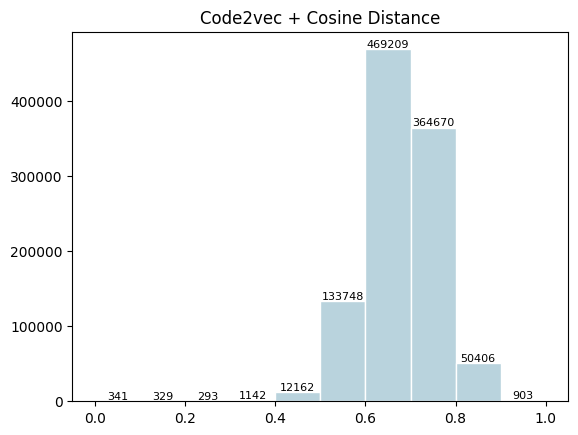

In [30]:
from matplotlib import pyplot as plt

df_cosine_norm = df_cosine
df_cosine_norm['cosine_distance'] = (df_cosine_norm['cosine_distance'] - df_cosine_norm['cosine_distance'].min()) / (df_cosine_norm['cosine_distance'].max() - df_cosine_norm['cosine_distance'].min())
df_cosine_norm

values, bins, bars = plt.hist(df_cosine_norm['cosine_distance'], edgecolor='white', color='#B9D3DD')
plt.bar_label(bars, fontsize=8, color='black')
plt.title("Code2vec + Cosine Distance")
plt.savefig('cos_dist.svg', format='svg')
plt.show()

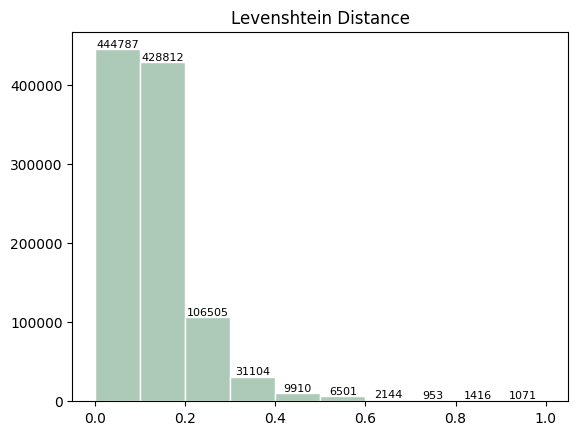

In [37]:
from matplotlib import pyplot as plt

df_lev_filter_norm = df_lev_filter
df_lev_filter_norm['Distance'] = (df_lev_filter_norm['Distance'] - df_lev_filter_norm['Distance'].min()) / (df_lev_filter_norm['Distance'].max() - df_lev_filter_norm['Distance'].min())
df_lev_filter_norm

values, bins, bars = plt.hist(df_lev_filter_norm['Distance'], edgecolor='white', color='#ADCAB9')
plt.bar_label(bars, fontsize=8, color='black')
plt.title("Levenshtein Distance")
plt.savefig('lev_dist.svg', format='svg')
plt.show()

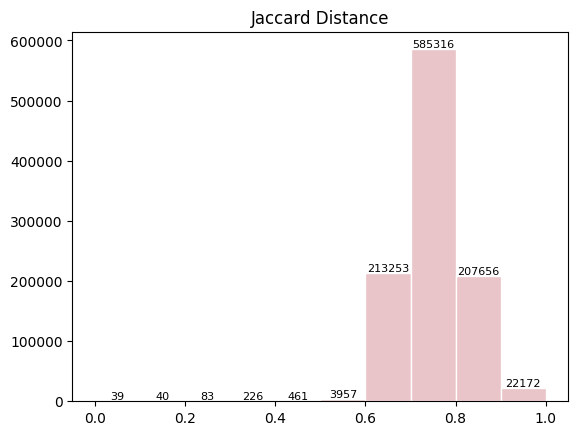

In [38]:
from matplotlib import pyplot as plt

df_jacc_filter_norm = df_jacc_filter
df_jacc_filter_norm['Distance'] = (df_jacc_filter_norm['Distance'] - df_jacc_filter_norm['Distance'].min()) / (df_jacc_filter_norm['Distance'].max() - df_jacc_filter_norm['Distance'].min())
df_jacc_filter_norm

values, bins, bars = plt.hist(df_jacc_filter_norm['Distance'], edgecolor='white', color='#E9C4C8')
plt.bar_label(bars, fontsize=8, color='black')
plt.title("Jaccard Distance")
plt.savefig('jacc_dist.svg', format='svg')
plt.show()